In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from NetEmbs import *
CONFIG.WORK_FOLDER = ("July5/RefactoringExperiments" + path_postfix_samplings, path_postfix_tf)

In [3]:
d_truth = upload_JournalEntriesTruth("Simulation/FSN_Data_v2.db")

In [4]:
import time
from pathos.multiprocessing import ProcessPool
import itertools
import os
import sys
from tqdm import *
from tqdm import tnrange, tqdm_notebook
import pickle
# CONFIG.WORK_FOLDER = ("July5/RefactoringExperiments" + path_postfix_samplings, path_postfix_tf)
# def get_size(obj, seen=None):
#     """Recursively finds size of objects"""
#     size = sys.getsizeof(obj)
#     if seen is None:
#         seen = set()
#     obj_id = id(obj)
#     if obj_id in seen:
#         return 0
#     # Important mark as seen *before* entering recursion to gracefully handle
#     # self-referential objects
#     seen.add(obj_id)
#     if isinstance(obj, dict):
#         size += sum([get_size(v, seen) for v in obj.values()])
#         size += sum([get_size(k, seen) for k in obj.keys()])
#     elif hasattr(obj, '__dict__'):
#         size += get_size(obj.__dict__, seen)
#     elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
#         size += sum([get_size(i, seen) for i in obj])
#     return size


# def wrappedRandomWalk2(node):
#     print(f"wrappedRandomWalk ------------> \n WALKS_PER_NODE={CONFIG.WALKS_PER_NODE}, \n WALKS_LENGTH={CONFIG.WALKS_LENGTH}")
#     return [randomWalk(CONFIG.GLOBAL_FSN, node, length=CONFIG.WALKS_LENGTH, direction=CONFIG.DIRECTION, \
#                        version=CONFIG.STEP_VERSION) for _ in range(CONFIG.WALKS_PER_NODE)]


# def graph_sampling2(n_jobs=4, direction=None):
#     """
#     Construction a sequences of nodes from given FSN
#     :param n_jobs: Number of parallel processes to be created
#     :param direction: initial direction
#     :return: array of sampled nodes
#     """
#     if direction is None:
#         direction = CONFIG.DIRECTION
#     max_processes = min(n_jobs, os.cpu_count())
#     pool = ProcessPool(nodes=max_processes)
# #     TO USE the newest CONFIG arguments we need to restart the Pool
#     pool.terminate()
#     pool.restart()
#     BPs = CONFIG.GLOBAL_FSN.get_BP()
#     n_BPs = len(BPs)
#     sampled = list()

#     if direction not in ["ALL", "IN", "OUT", "COMBI", "RANDOM"]:
#         raise ValueError(
#             "Given not supported yet direction of walking {!s}!".format(direction) + "\nAllowed only " + str(
#                 ["ALL", "IN", "OUT"]))
#     if direction == "ALL":
#         print("Chosen ALL direction, hence, run both IN and OUT randomWalks from each node...")
#         if LOG:
#             local_logger = logging.getLogger("NetEmbs.Utils.graph_sampling")
#             local_logger.info("Chosen direction ALL, hence, run both IN and OUT randomWalks from each node! ")
#         try:
#             with tqdm_notebook(total=n_BPs) as pbar:
#                 for i, res in tqdm_notebook(enumerate(
#                         pool.uimap(wrappedRandomWalkIN, BPs))):
#                     sampled.append(res)
#                     pbar.update()
#         except KeyboardInterrupt:
#             print('got ^C while pool mapping, terminating the pool')
#             pool.terminate()
#         pool.terminate()
#         pool.restart()
#         print("Done with IN direction!")
#         try:
#             with tqdm_notebook(total=n_BPs) as pbar:
#                 for i, res in tqdm_notebook(enumerate(
#                         pool.uimap(wrappedRandomWalkOUT, BPs))):
#                     sampled.append(res)
#                     pbar.update()
#         except KeyboardInterrupt:
#             print('got ^C while pool mapping, terminating the pool')
#             pool.terminate()
#     elif direction in ["COMBI", "IN", "OUT", "RANDOM"]:
#         # sampled = [wrappedRandomWalk(node) for node in tqdm(GLOBAL_FSN.get_BP())]
#         try:
#             with tqdm(total=n_BPs) as pbar:
#                 for i, res in tqdm_notebook(enumerate(
#                         pool.uimap(wrappedRandomWalk2, BPs))):
#                     sampled.append(res)
#                     pbar.update()
#         except KeyboardInterrupt:
#             print('got ^C while pool mapping, terminating the pool')
#             pool.terminate()
#     res = list(itertools.chain(*sampled))
#     pool.terminate()
#     pool.restart()
#     return res

# def make_pairs2(sampled_seq, window=None, debug=False):
#     """
#     Helper function for construction pairs from sequence of nodes with given window size
#     :param sampled_seq: Original sequence of nodes (output of RandomWalk procedure)
#     :param window: window size, how much predecessors and successors one takes into account
#     :param debug: print intermediate stages
#     :return:
#     """
#     if debug:
#         print(sampled_seq)
#     output = list()
#     if window is None:
#         window = CONFIG.WINDOW_SIZE
#     try:
#         for cur_idx in range(len(sampled_seq)):
#             for drift in range(max(0, cur_idx - window), min(cur_idx + window + 1, len(sampled_seq))):
#                 if drift != cur_idx:
#                     output.append((sampled_seq[cur_idx], sampled_seq[drift]))
#         if len(output) < 2 and debug:
#             print(output)
#         return output
#     except TypeError:
#         print("t")

# def get_pairs2(n_jobs=4, direction=CONFIG.DIRECTION, drop_duplicates=True, use_cache=True):
#     """
#     Construction a pairs (skip-grams) of nodes according to sampled sequences
#     :param n_jobs: Number of parallel processes to be created
#     :param direction: initial direction
#     :param drop_duplicates: True, delete pairs with equal elements
#     :return: array of pairs(joint appearance of two BP nodes)
#     """
#     if direction not in ["ALL", "IN", "OUT", "COMBI", "RANDOM"]:
#         raise ValueError(
#             "Given not supported yet direction of walking {!s}!".format(direction) + "\nAllowed only " + str(
#                 ["ALL", "IN", "OUT", "COMBI", "RANDOM"]))
#     if not use_cache:
#         if PRINT_STATUS:
#             print("--------- Started the SAMPLING the sequences from FSN ---------")

#         start_time = time.time()
#         sequences = list()
# #         TODO here we construct sequences!
#         sequences = graph_sampling2(n_jobs)
#         print("--------- ----------------------- ---------")
#         if CONFIG.HACK:
# #             Explicitly sample the 1-hop neighbours 
#             CONFIG.WALKS_PER_NODE = int(CONFIG.HACK*CONFIG.WALKS_PER_NODE*CONFIG.WALKS_LENGTH*CONFIG.WALKS_LENGTH/CONFIG.WINDOW_SIZE)
#             CONFIG.WALKS_LENGTH = 2
#             print("Additionally sample the nearest neighbours...")
#             sequences.extend(graph_sampling2(n_jobs))
#         end_time = time.time()
#         print("Elapsed time for sampling: ", end_time - start_time)
#         print("Cashing sampled sequences...")
#         with open(CONFIG.WORK_FOLDER[0] + "sampled_seqs_cached.pkl", "wb") as file:
#             pickle.dump(sequences, file)
#     if PRINT_STATUS:
#         print("--------- Ended the SAMPLING the sequences from FSN ---------")
#     max_processes = min(n_jobs, os.cpu_count())
#     pool = ProcessPool(nodes=max_processes)
#     if PRINT_STATUS:
#         print("--------- Started making pairs from the sequences ---------")
#     pairs = pool.map(make_pairs2, sequences)
#     if PRINT_STATUS:
#         print("--------- Ended making pairs from the sequences ---------")
#     if drop_duplicates:
#         pairs = [item for sublist in pairs for item in sublist if item[0] != item[1]]
#     else:
#         pairs = [item for sublist in pairs for item in sublist]
#     pool.terminate()
#     pool.restart()
#     if LOG:
#         local_logger = logging.getLogger("NetEmbs.Utils.get_pairs")
#         local_logger.info("Total number of raw sampled pairs is " + str(len(pairs)))
#     return pairs

# def get_SkipGrams2(df, version="MetaDiff", walk_length=10, walks_per_node=10, direction="COMBI", use_cache=False):
#     """
#     Get Skip-Grams for given DataFrame with Entries records
#     :param df: original DataFrame
#     :param version: Version of step:
#     "DefUniform" - Pure RandomWalk (uniform probabilities, follows the direction),
#     "DefWeighted" - RandomWalk (weighted probabilities, follows the direction),
#     "MetaUniform" - Default Metapath-version (uniform probabilities, change directions),
#     "MetaWeighted" - Weighted Metapath version (weighted probabilities "rich gets richer", change directions),
#     "MetaDiff" - Modified Metapath version (probabilities depend on the differences between edges, change directions)
#     :param walk_length: max length of RandomWalk
#     :param walks_per_node: max number of RandomWalks per each node in FSN
#     :param direction: initial direction
#     :param use_cache: If True, cache the intermediate SkipGrams sequences
#     :return: list of all pairs
#     :return fsn: FSN class instance for given DataFrame
#     :return tr: Encoder/Decoder for given DataFrame
#     """
#     # TODO check current version vs. CONFIG.GLOBAL_FSN

#     CONFIG.GLOBAL_FSN = FSN()
#     CONFIG.GLOBAL_FSN.build(df, left_title="FA_Name")
#     # Update CONFIG parameters w.r.t the given arguments
#     CONFIG.WALKS_LENGTH = walk_length
#     CONFIG.WALKS_PER_NODE = walks_per_node
#     CONFIG.DIRECTION = direction
#     CONFIG.STEP_VERSION = version

#     if not use_cache:
#         print("Start sampling... wait...")
#         skip_gr = get_pairs(N_JOBS, CONFIG.DIRECTION, use_cache=use_cache)
#         with open(CONFIG.WORK_FOLDER[0] + "skip_grams_cached.pkl", "wb") as file:
#             pickle.dump(skip_gr, file)
#         print("Sampled SkipGrams are saved in cache... Total size is ", get_size(skip_gr), " bytes")
#     elif use_cache:
#         print("Loading SkipGrams from cache... wait...")
#         try:
#             with open(CONFIG.WORK_FOLDER[0] + "skip_grams_cached.pkl", "rb") as file:
#                 skip_gr = pickle.load(file)
#         except FileNotFoundError:
#             print("File not found... Recalculate \n")
#             print("Start sampling... wait...")
#             skip_gr = get_pairs(N_JOBS, CONFIG.DIRECTION, use_cache=use_cache)
#             with open(CONFIG.WORK_FOLDER[0] + "skip_grams_cached.pkl", "wb") as file:
#                 pickle.dump(skip_gr, file)
#     else:
#         raise ValueError(
#             "Use True or False for skip_gr argument! {!s}!".format(use_cache) + " was given")
#     return skip_gr


## Upload data

In [5]:
DB_PATH = "Simulation/FSN_Data_v2.db"
d = upload_data(DB_PATH, limit=1000)
d = prepare_data(d)

Final shape of DataFrame is  (958, 9)


In [6]:
from NetEmbs.utils.IO import *
create_working_folder()

Working directory is  July5/RefactoringExperiments_versionMetaDiff_directionCOMBI_walks30_pressure30_window2_1hopFraction0.4/TFsteps10000batch64_emb32/


In [7]:
def countNext(df):
    c=df.groupby("Next").count()
    return pd.Series(dict(zip(list(c.T), c.T.values[0])))

In [8]:
CONFIG.WINDOW_SIZE = 3
# CONFIG.PRESSURE = 10
# CONFIG.WALKS_PER_NODE = 10
# CONFIG.WALKS_LENGTH = 10
CONFIG.HACK = 0.5
print(f"Current config parameters: \n WALKS_PER_NODE={CONFIG.WALKS_PER_NODE}, \n walk_length={CONFIG.WALKS_LENGTH}")
print(f"PRESSURE={CONFIG.PRESSURE} \n WINDOW_SIZE={CONFIG.WINDOW_SIZE}")
cur_pairs = get_SkipGrams2(d, walks_per_node=CONFIG.WALKS_PER_NODE, \
                          walk_length=CONFIG.WALKS_LENGTH, use_cache=False)
print(len(cur_pairs))

Current config parameters: 
 WALKS_PER_NODE=30, 
 walk_length=10
PRESSURE=30 
 WINDOW_SIZE=3
Start sampling... wait...
--------- Started the SAMPLING the sequences from FSN ---------


 96%|█████████▋| 158/164 [00:02<00:00, 54.75it/s]
158it [00:02, 55.09it/s]
100%|██████████| 164/164 [00:02<00:00, 59.14it/s]


Additionally sample the nearest neighbours...


 97%|█████████▋| 159/164 [00:04<00:00, 36.12it/s]
159it [00:04, 36.17it/s]
100%|██████████| 164/164 [00:04<00:00, 35.36it/s]


Elapsed time for sampling:  8.111289024353027
Cashing sampled sequences...
--------- Ended the SAMPLING the sequences from FSN ---------
--------- Started making pairs from the sequences ---------
--------- Ended making pairs from the sequences ---------
Sampled SkipGrams are saved in cache... Total size is  30843512  bytes
374808


In [9]:
map_truth = dict(zip(d_truth.ID.values, d_truth.GroundTruth.values))
cur_truth = pd.DataFrame(data=[[map_truth[pair[0]], map_truth[pair[1]]] for pair in cur_pairs], columns=["Current", "Next"])
final_df = cur_truth.groupby("Current").apply(countNext).reset_index()\
        .pivot(index='Current', columns='level_1', values=0).fillna(0)
del final_df.index.name
del final_df.columns.name
final_df

,Collections,Depreciation,Disbursement,Fixed Assets,Good delivery,Payroll,Payroll Disbursement,Purchase,Sales 21 btw,Sales 6 btw,Sales tax
Collections,46844.0,0.0,6527.0,2356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Depreciation,0.0,14204.0,0.0,4.0,23.0,11.0,0.0,1.0,9.0,10.0,0.0
Disbursement,6527.0,0.0,9156.0,8481.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0
Fixed Assets,2356.0,4.0,8481.0,9414.0,14.0,1.0,0.0,0.0,8.0,26.0,0.0
Good delivery,0.0,23.0,2.0,14.0,82022.0,87.0,0.0,1.0,10.0,57.0,0.0
Payroll,0.0,11.0,0.0,1.0,87.0,38872.0,0.0,1.0,1703.0,339.0,0.0
Payroll Disbursement,0.0,0.0,0.0,0.0,0.0,0.0,6014.0,0.0,0.0,0.0,11092.0
Purchase,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1390.0,0.0,5.0,0.0
Sales 21 btw,0.0,9.0,1.0,8.0,10.0,1703.0,0.0,0.0,27102.0,10791.0,0.0
Sales 6 btw,0.0,10.0,4.0,26.0,57.0,339.0,0.0,5.0,10791.0,31504.0,0.0


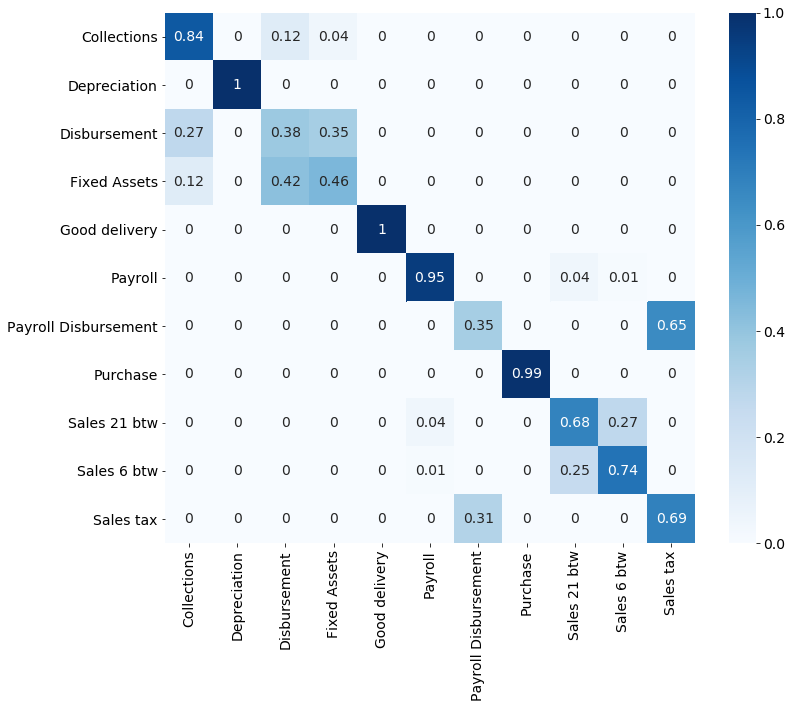

In [10]:
import seaborn as sns
set_font(14)
plt.figure(figsize=(12, 10))
sns.heatmap(final_df.apply(lambda x: round(x/x.sum(), 2), axis=1), cmap="Blues", annot=True, square=True) 
# plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("img/SensitivityAnalysis/Middle_finWalk_winSize"+str(CONFIG.WINDOW_SIZE)\
            +"_walks"+str(CONFIG.WALKS_PER_NODE)\
            +"_length"+str(CONFIG.WALKS_LENGTH) \
            +"_pressure"+str(CONFIG.PRESSURE)\
            +"_hack"+str(CONFIG.HACK)+".jpg", dpi=140, pad_inches=0.01)